Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   

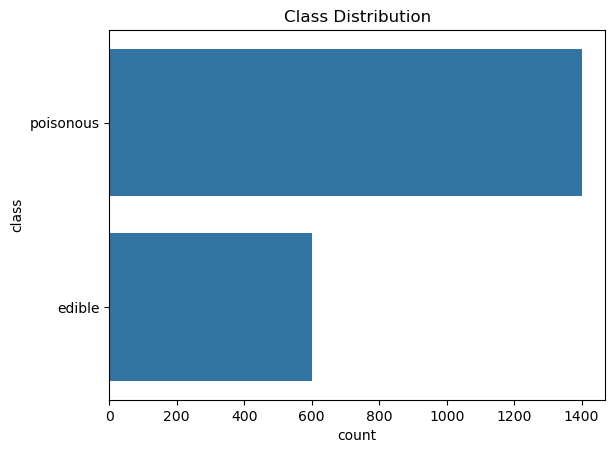

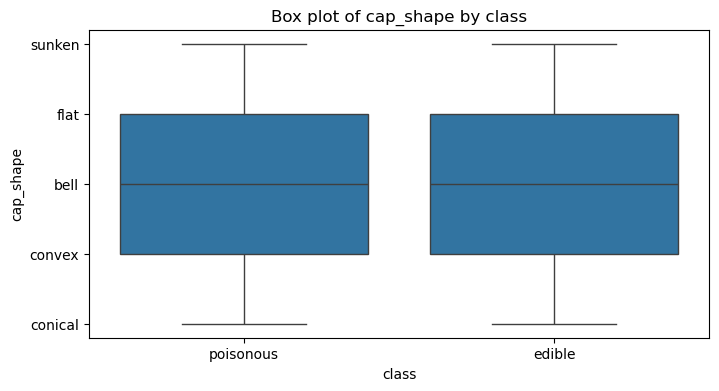

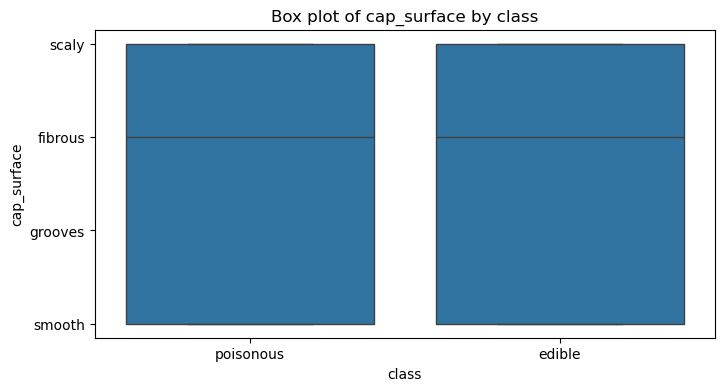

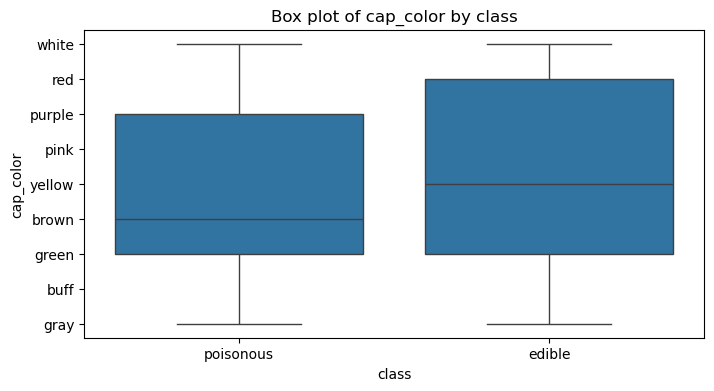

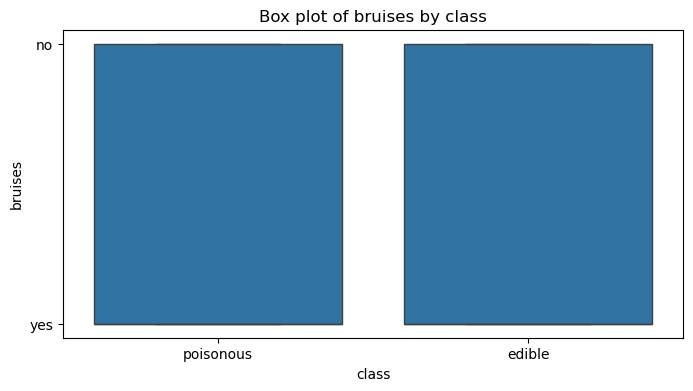

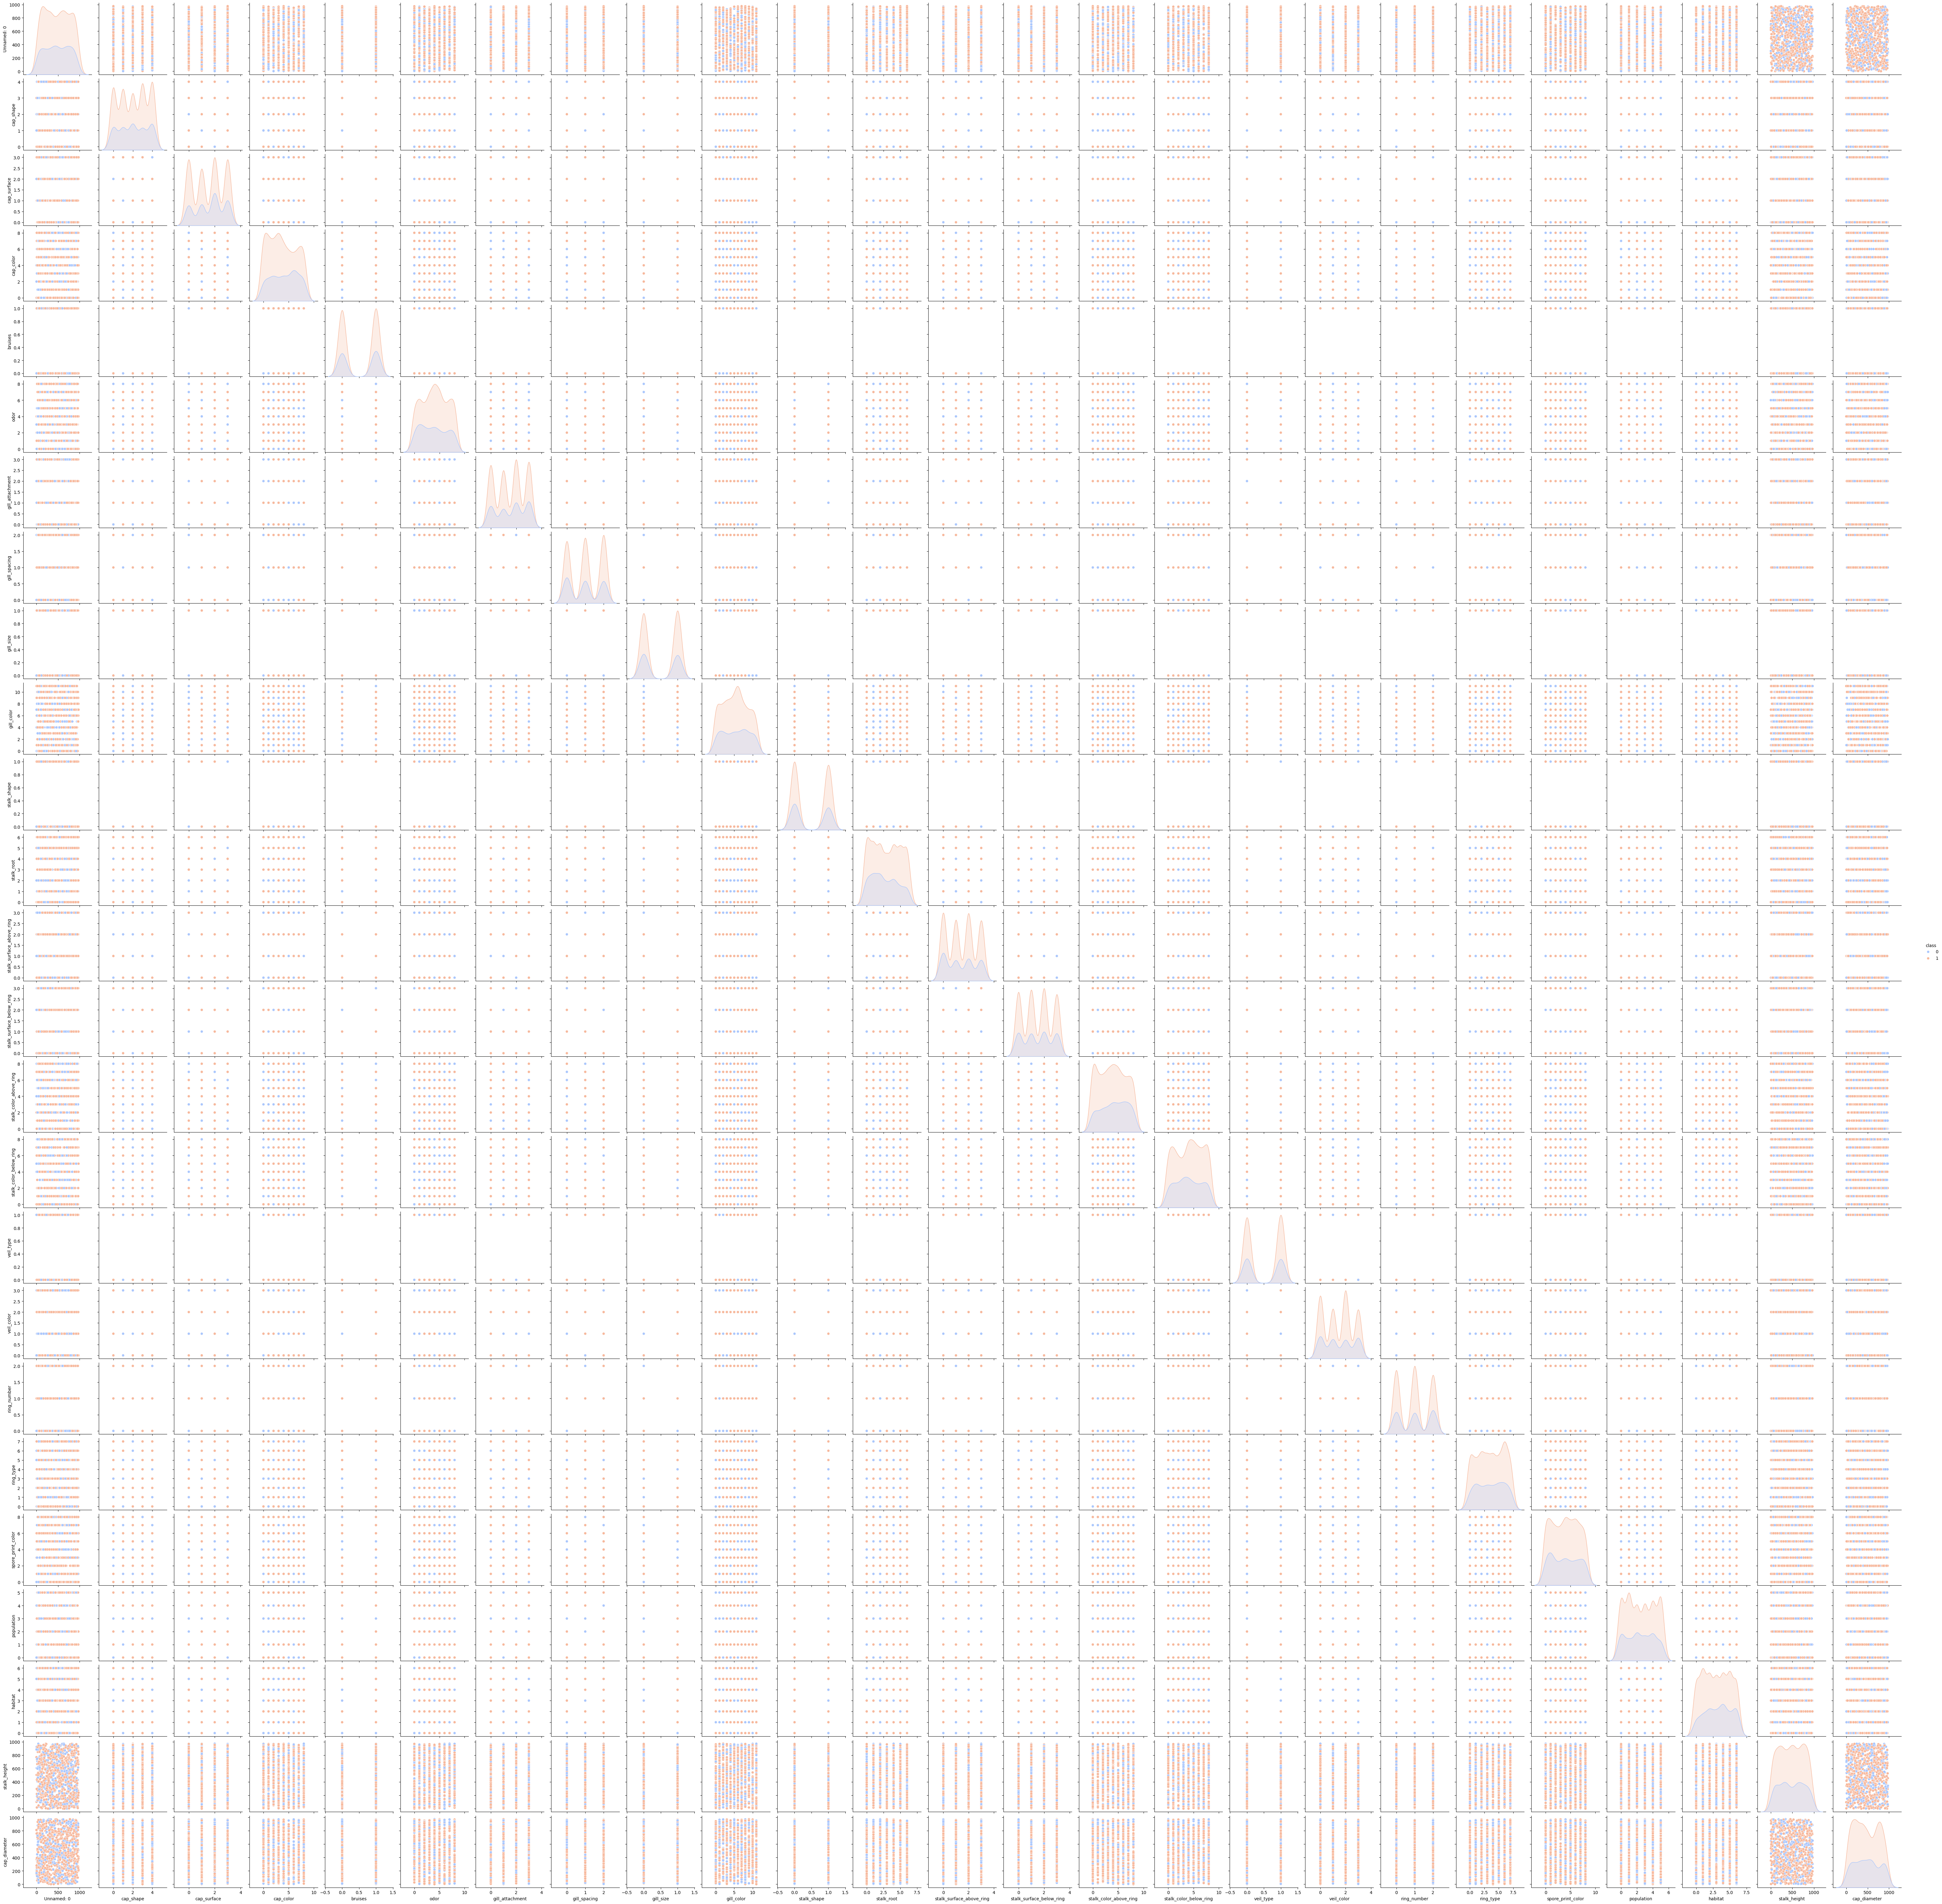

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600


Confusion Matrix:
[[  0 185]
 [  0 415]]

Accuracy Score:
0.6916666666666667


C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


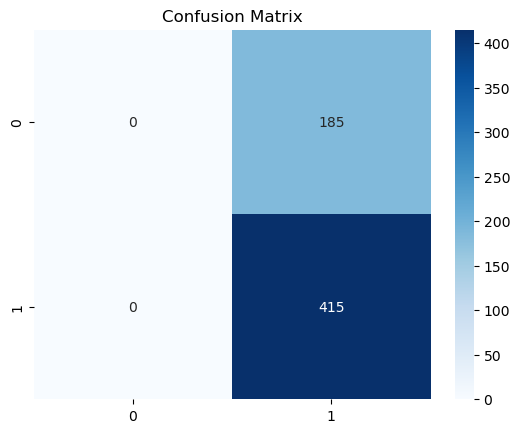

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('mushroom.csv')

# Task 1: Exploratory Data Analysis (EDA)
# Inspect the dataset
print("Dataset Information:")
print(df.info())

print("\nFirst few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Plot class distribution (Target variable: 'class')
sns.countplot(df['class'])
plt.title("Class Distribution")
plt.show()

# Boxplot and distribution of some features
for column in df.columns[1:5]:  # Just showing first few features for simplicity
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y=column, data=df)
    plt.title(f"Box plot of {column} by class")
    plt.show()

# Task 2: Data Preprocessing
# Encode categorical variables
labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

# Split the dataset into training and testing sets
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Task 3: Data Visualization
# Scatter plot matrix
sns.pairplot(df, hue='class', palette='coolwarm')
plt.show()

# Task 4: SVM Implementation
# Basic SVM classifier
svm_model = SVC(kernel='linear')  # Start with linear kernel
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Task 5: Visualization of SVM Results
# Plotting confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Task 6: Parameter Tuning and Optimization
# Grid Search for Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)

# Evaluate with the best parameters
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("\nClassification Report with Best Parameters:")
print(classification_report(y_test, y_pred_best))

print("\nAccuracy Score with Best Parameters:")
print(accuracy_score(y_test, y_pred_best))

# Task 7: Comparison and Analysis
# Compare SVM performance with different kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

